Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7807 - loss: 0.6139 - val_accuracy: 0.7904 - val_loss: 0.5790 - learning_rate: 0.0010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8197 - loss: 0.5024 - val_accuracy: 0.8475 - val_loss: 0.4217 - learning_rate: 0.0011
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8277 - loss: 0.4773 - val_accuracy: 0.8338 - val_loss: 0.4447 - learning_rate: 0.0013
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8313 - loss: 0.4691 - val_accuracy: 0.8473 - val_loss: 0.4315 - learning_rate: 0.0014
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8309 - loss: 0.4677 - val_accuracy: 0.8483 - val_loss: 0.4129 - learning_rate: 0.0016
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8336 - loss: 0.4631 - val_accuracy: 0.8437 - val_loss: 0.4142 - learning_rate: 0.0018
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8370 - l

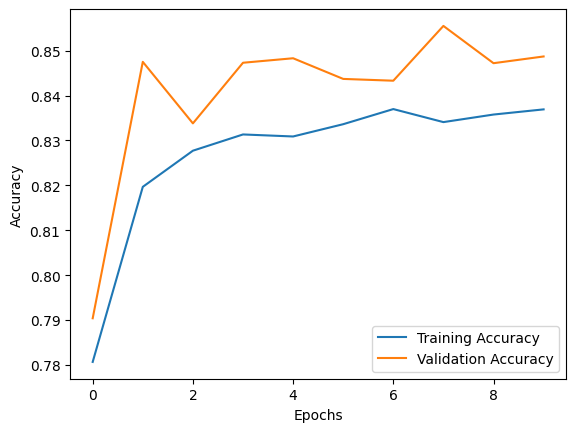

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted class: 9


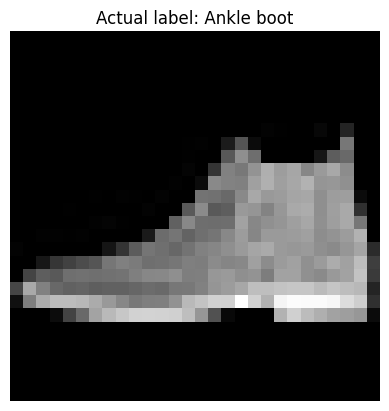

In [13]:
import numpy as np
import tensorflow as tf

data= np.load('./fashion-mnist.npz')
X_train=data['x_train']
Y_train=data['y_train']
X_test=data['x_test']
Y_test=data['y_test']

X_train,X_test=X_train/255.0,X_test/255.0


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])



model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test), callbacks=[lr_schedule])


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


pred = model.predict(np.expand_dims(X_test[0], axis=0))
print("Predicted class:", np.argmax(pred))


class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(X_test[0], cmap='gray')
plt.title(f"Actual label: {class_names[Y_test[0]]}")
plt.axis('off')
plt.show()